# How to open a PyStructure

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#make plots look nicer
from matplotlib import rc
rc('font',family='DejaVu Sans',size=20)
rc('mathtext',fontset='dejavusans')
rc('figure', figsize=(1.41421356237*6.,6.)) 
rc('lines', linewidth=1.8,marker=None,markersize=8 )
rc('axes', linewidth=1.5,labelsize=19,prop_cycle=plt.cycler(color=('k','r','b','darkorange','steelblue','hotpink','gold','c','maroon','darkgreen')) )
rc(('xtick.major','ytick.major'), size=5.2,width=1.5)
rc(('xtick.minor','ytick.minor'), size=3.2,width=1.5,visible=True)
rc(('xtick','ytick'), labelsize=16, direction='in' )
rc(('xtick'), top=True,bottom=True ) # For some stupid reason you have to do these seperately
rc(('ytick'), left=True
   ,right=True )
rc('legend',numpoints=1,scatterpoints=1,labelspacing=0.2,fontsize=18,fancybox=True,handlelength=1.5,
            handletextpad=0.5)
rc('savefig', dpi=150,format='pdf',bbox='tight' )
rc('errorbar',capsize=3.)

**Import the PyStructure**

In [18]:
struct = np.load('./../PyStructure/Output/ngc5194_data_struct_23as_2020_10_26.npy',allow_pickle = True).item()

A structure is just a collection of points:

In [19]:
struct["INT_VAL_12CO21"]

array([0., 0., 0., ..., 0., 0., 0.])

In [20]:
struct.keys()

dict_keys(['gal', 'ra_deg', 'dec_deg', 'dist_mpc', 'posang_deg', 'incl_deg', 'beam_as', 'rgal_as', 'rgal_kpc', 'rgal_r25', 'theta_rad', 'SPEC_VAL_12CO21', 'SPEC_VCHAN0_12CO21', 'SPEC_DELTAV_12CO21', 'SPEC_UC_12CO21', 'SPEC_COV_12CO21', 'SPEC_RES_12CO21', 'SPEC_UNIT_12CO21', 'SPEC_DESC_12CO21', 'INT_VAL_12CO21', 'INT_UC_12CO21', 'INT_COV_12CO21', 'INT_RES_12CO21', 'INT_UNIT_12CO21', 'INT_DESC_12CO21', 'SPEC_VAL_CII', 'SPEC_VCHAN0_CII', 'SPEC_DELTAV_CII', 'SPEC_UC_CII', 'SPEC_COV_CII', 'SPEC_RES_CII', 'SPEC_UNIT_CII', 'SPEC_DESC_CII', 'INT_VAL_CII', 'INT_UC_CII', 'INT_COV_CII', 'INT_RES_CII', 'INT_UNIT_CII', 'INT_DESC_CII', 'INT_VAL_V12CO21', 'SPEC_VAL_SHUFF12CO21', 'SPEC_VCHAN0_SHUFF12CO21', 'SPEC_DELTAV_SHUFF12CO21', 'SPEC_UC_SHUFF12CO21', 'SPEC_COV_SHUFF12CO21', 'SPEC_RES_SHUFF12CO21', 'SPEC_UNIT_SHUFF12CO21', 'SPEC_DESC_SHUFF12CO21', 'SPEC-DELTAV_SHUFF12CO21', 'SPEC_VAL_SHUFFCII', 'SPEC_VCHAN0_SHUFFCII', 'SPEC_DELTAV_SHUFFCII', 'SPEC_UC_SHUFFCII', 'SPEC_COV_SHUFFCII', 'SPEC_RES_SHUFF

# Make a nice Intensity Map

We can recunstruct the image based on the coordinates of every point:

In [19]:
# get the coordinates from the structure
ra = struct["ra_deg"]
dec = struct["dec_deg"]

#get the CO21 intensity
int_co21 = struct["INT_VAL_12CO21"]

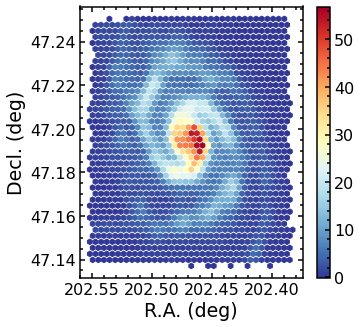

In [21]:
plt.figure(figsize=(5,5))
ax = plt.subplot(1,1,1)
im = ax.scatter(ra,dec,c=int_co21,marker="h",s=30, cmap="RdYlBu_r")
plt.colorbar(im)
ax.invert_xaxis()
ax.set_xlabel("R.A. (deg)")
ax.set_ylabel("Decl. (deg)")
plt.show()

# Futher Info Saved in Structure

In [22]:
#get the distance to the center of every point
rgal_kpc = struct["rgal_kpc"]

#get the uncertainties in co21 intensitie (needed for S/N determination)
uc_co21 = struct["INT_UC_12CO21"]

**Plot intensity as function of galactocentric radius**

In [23]:
#determine the S/N of every datapoint
SN_co21 = int_co21/uc_co21

#points with significant detection (S/N>3)
idx_detect = np.where(SN_co21>3)
idx_non_detect = np.where(SN_co21<=3)

Text(0, 0.5, 'Integrated CO(2-1) Int. [K m/s]')

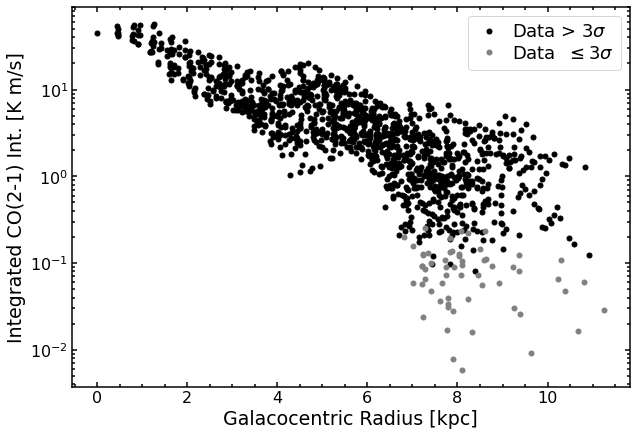

In [24]:
plt.figure(figsize=(10,7))
ax = plt.subplot(1,1,1)

#plot the detections
ax.plot(rgal_kpc[idx_detect],int_co21[idx_detect],"o", label = r"Data > 3$\sigma$", ms=5)

#plot the nondetections
ax.plot(rgal_kpc[idx_non_detect],int_co21[idx_non_detect],"o", ms=5,c = "grey", label = r"Data  $\leq 3\sigma$")

ax.set_yscale("log")
ax.legend()

ax.set_xlabel("Galacocentric Radius [kpc]")
ax.set_ylabel("Integrated CO(2-1) Int. [K m/s]")

# Select a certain Pixel and investigate the Spectrum

In [25]:
vaxis = struct["SPEC_VCHAN0_12CO21"]+np.arange(len(struct["SPEC_VAL_12CO21"][0]))*struct["SPEC_DELTAV_12CO21"]

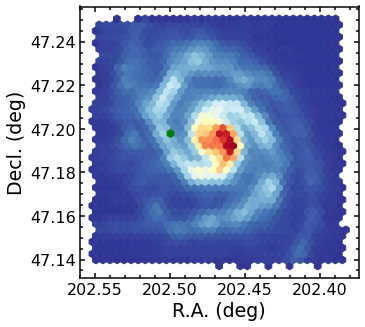

In [26]:
plt.figure(figsize=(5,5))
ax = plt.subplot(1,1,1)
ax.scatter(ra,dec,c=int_co21,marker="h",s=60, cmap="RdYlBu_r")
ax.scatter(ra[780],dec[780],color = "green",marker="h",s=60, cmap="RdYlBu_r")
ax.invert_xaxis()
ax.set_xlabel("R.A. (deg)")
ax.set_ylabel("Decl. (deg)")
plt.show()

Text(0, 0.5, 'Int [K]')

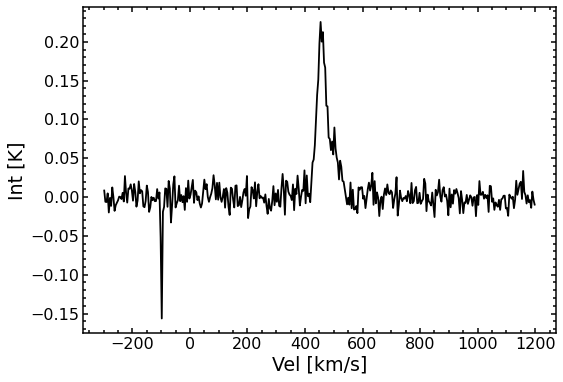

In [27]:
plt.plot(vaxis/1000, struct["spec_val_12co21".upper()][780])
plt.xlabel("Vel [km/s]")
plt.ylabel("Int [K]")

# The shuffeled spectrum is centered at 0 km/s

Text(0, 0.5, 'Int [K]')

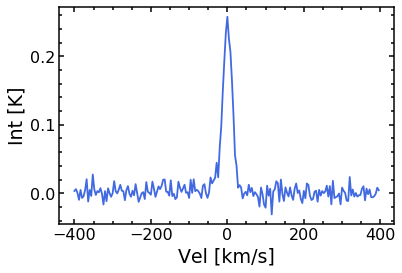

In [79]:
vaxis_shuff = struct["SPEC_VCHAN0_SHUFF12CO21"]+np.arange(len(struct["SPEC_VAL_SHUFF12CO21"][0]))*struct["SPEC-DELTAV_SHUFF12CO21"]
plt.plot(vaxis_shuff/1000,struct["spec_val_SHUFF12co21".upper()][250],color="royalblue")
plt.xlabel("Vel [km/s]")
plt.ylabel("Int [K]")